# Lab01: Assignment
In this assignment you're required to find whether the given numbers are prime or not using sequential and parallel processing and then compare the performance of both

## 1. Sequential processing

In [1]:
from time import time
from multiprocessing import Process, Queue, current_process
from queue import Empty # exception to break from loop when the get(block=False) called on empty queue 

In [2]:
numbers = [15492781, 15492787, 15492803, 
           15492811, 15492810, 15492833, 
           15492859, 15502547, 15520301, 15527509]

In [3]:
msg = " is the process that checked primeness of "
def is_prime(number):
    """returns True if number 
    is prime, False otherwise"""
    if number <= 1:
        print(str(current_process().name) + msg + str(number))
        return False
    if number <= 3:
        print(str(current_process().name) + msg + str(number))
        return True
    for i in range(3, number):
        if number % i == 0:
            print(str(current_process().name) + msg + str(number))
            return False
    print(str(current_process().name) + msg + str(number))
    return True
        

if __name__ == "__main__":
    # 1. record the start time using time() function of time module     
    start = time()
    
    for number in numbers:
        print(str(number) + " " + str(is_prime(number)))
    
    end = time()
    
    # 3. record the performance and print out
    t_seq = end - start
    print("total time taken = ", t_seq)

MainProcess is the process that checked primeness of 15492781
15492781 True
MainProcess is the process that checked primeness of 15492787
15492787 True
MainProcess is the process that checked primeness of 15492803
15492803 True
MainProcess is the process that checked primeness of 15492811
15492811 True
MainProcess is the process that checked primeness of 15492810
15492810 False
MainProcess is the process that checked primeness of 15492833
15492833 True
MainProcess is the process that checked primeness of 15492859
15492859 True
MainProcess is the process that checked primeness of 15502547
15502547 True
MainProcess is the process that checked primeness of 15520301
15520301 True
MainProcess is the process that checked primeness of 15527509
15527509 True
total time taken =  6.812518119812012


## 2. Parallel processing

In [4]:
def check_prime_worker(job_queue):
    """worker function passed as target to Process"""
    while True:
        # 1. get next available number from queue
        # 2. print the number and whether it
        #    is prime or not, use is_prime()
        # 3. use try/except to catch Empty exception 
        #    and quit the loop if no number remains in queue

        try:
            num = job_queue.get(block=False)
        except Empty:
            return 0
        
        is_prime(num)
        
        # uncomment to see results
        # print(str(num) + " " + str(is_prime(num)))
        
        
# calculate if the numbers are prime or not
# measure the performance of parallel processing
if __name__ == "__main__":
    job_queue = Queue()
    t_par = []
    
    # number of workers 
    for N in range(1, len(numbers)+1):
        # preparing the jobs to be done by workers
        for n in numbers:
            job_queue.put(n)

        # 1. create list of processes of N process. Choose N in range of [1:len(numbers)]
        procs = [Process(target=check_prime_worker, args=(job_queue,)) for i in range(N)]
        
        # 2. record the start time 
        start = time()
        
        # 3. start each of the processes
        [p.start() for p in procs]
        
        # 4. call join on each of the processes
        [p.join() for p in procs]
        
        # 5. measure the performance and append to the list of records
        t_par.append(time() - start)
        
        print()
        
        # 6. close the processes
        [p.close() for p in procs]
        
        
print(t_par)

Process-1 is the process that checked primeness of 15492781
Process-1 is the process that checked primeness of 15492787
Process-1 is the process that checked primeness of 15492803
Process-1 is the process that checked primeness of 15492811
Process-1 is the process that checked primeness of 15492810
Process-1 is the process that checked primeness of 15492833
Process-1 is the process that checked primeness of 15492859
Process-1 is the process that checked primeness of 15502547
Process-1 is the process that checked primeness of 15520301
Process-1 is the process that checked primeness of 15527509

Process-2 is the process that checked primeness of 15492781
Process-3 is the process that checked primeness of 15492787
Process-3 is the process that checked primeness of 15492811
Process-3 is the process that checked primeness of 15492810
Process-2 is the process that checked primeness of 15492803
Process-3 is the process that checked primeness of 15492833
Process-2 is the process that checked p

Bonus points will be given if you show/print the name of the process that did calculation for given number (use current_process() from multiprocessing module) 

## 3. Compare the performance of Sequential processing against Parallel processing 
Draw a simple 2D graph using matplotlib:
- X axis should be number of processes from part 2, i.e., it should have values: 1, 2, 3,.., len(numbers)
- Y axis should be ratio of "time for sequential processing" (t_seq) to a "time for parallel processing" (t_par[i-1]) when i processes are used.

Explain the results in a few sentences and what factors can affect it?

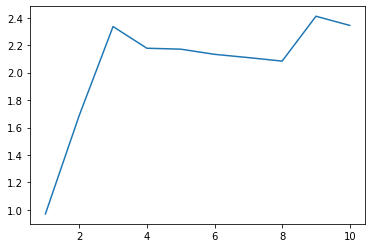

In [6]:
import matplotlib.pyplot as plt

x = [i for i in range(1, len(numbers)+1)]
y = [t_seq / t_par[i] for i in range(len(numbers))]

plt.plot(x, y)

# Comment:
The total time taken to check all primes will decrease when we increase the number of processes, however, using too many processes might as well introduce extra overhead that made the overall performace slightly smaller

Overall, execution time depends on several factors other than the code itself, such as the CPU speed, the number of cores, whether some data was cached or not, etc.